### Background Information
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.

Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


Datasets
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


Submission File Format:
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

·         ID ( sorted in any order)

·         default (contains 0 & 1, 1 represents default)

## Importing libraries

In [107]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading Data

In [111]:
df_test = pd.read_csv("Test.csv")  ##  code to read the test data
data_test = df_test.copy()
df_train = pd.read_csv("Train.csv")  ##  code to read the train data
data_train = df_train.copy()

<IPython.core.display.Javascript object>

In [112]:
# Checking the number of rows and columns in the training data
data_train.shape  ##  code to view dimensions of the train data

(93174, 23)

<IPython.core.display.Javascript object>

In [113]:
# Checking the number of rows and columns in the test data
data_test.shape  ##  code to view dimensions of the test data

(39933, 22)

<IPython.core.display.Javascript object>

## Data Overview

In [114]:
data_train.head()  ##  code to view top 5 rows of the train data

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,14257956,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


<IPython.core.display.Javascript object>

In [115]:
data_test.head()  ##  code to view top 5 rows of the test data

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.310,C,C2,<5 Years,MORTGAGE,73400.000,Not Verified,debt_consolidation,CA,14.620,0.000,0.000,22156,30.000,2290.240,INDIVIDUAL,87.000,128098.000,25800.000
1,66862420,12000,3 years,7.260,A,A4,10+ years,MORTGAGE,105000.000,Not Verified,credit_card,VA,11.380,0.000,0.000,7592,14.000,202.680,INDIVIDUAL,13.000,269396.000,23600.000
2,3637416,15000,3 years,14.330,C,C1,6-10 years,MORTGAGE,50000.000,Verified,debt_consolidation,TX,28.150,0.000,1.000,17983,19.000,1166.240,INDIVIDUAL,30.000,220135.000,34100.000
3,53682249,12000,3 years,9.990,B,B3,6-10 years,RENT,37000.000,Source Verified,credit_card,NJ,34.320,0.000,0.000,12262,18.000,635.060,INDIVIDUAL,35.000,39436.000,21700.000
4,53937165,20150,3 years,11.530,B,B5,<5 Years,RENT,75000.000,Source Verified,debt_consolidation,CA,26.740,1.000,0.000,8251,11.000,1232.840,INDIVIDUAL,31.000,52764.000,12000.000


<IPython.core.display.Javascript object>

In [116]:
data_train.tail()  ##  code to view bottom 5 rows of the train data

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.260,A,A4,<5 Years,RENT,85000.000,Not Verified,debt_consolidation,FL,17.110,0.000,0.000,7924,38.000,55.340,INDIVIDUAL,13.000,64635.000,47600.000,0
93170,836021,3500,3 years,5.420,A,A1,NaN,MORTGAGE,57550.000,Not Verified,other,FL,22.640,0.000,0.000,10174,24.000,299.670,INDIVIDUAL,161.000,NaN,NaN,1
93171,33058720,8000,3 years,13.980,C,C3,10+ years,RENT,148531.500,Source Verified,credit_card,AK,13.040,1.000,0.000,5391,25.000,1150.580,INDIVIDUAL,65.000,94596.000,6500.000,0
93172,4060472,35000,3 years,17.770,D,D1,<5 Years,RENT,100000.000,Verified,debt_consolidation,CA,17.220,0.000,0.000,24609,45.000,5764.580,INDIVIDUAL,56.000,33759.000,34900.000,1
93173,3628127,10000,3 years,15.800,C,C3,<5 Years,RENT,60000.000,Verified,debt_consolidation,NJ,11.830,0.000,0.000,11285,7.000,2279.360,INDIVIDUAL,104.000,25594.000,12300.000,0


<IPython.core.display.Javascript object>

In [117]:
data_test.tail()  ##  code to view bottom 5 rows of the test data

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
39928,57779318,5000,3 years,8.180,B,B1,10+ years,MORTGAGE,65000.000,Source Verified,home_improvement,MI,13.090,0.000,5.000,6731,24.000,187.270,INDIVIDUAL,26.000,14422.000,26100.000
39929,59742362,1800,3 years,11.530,B,B5,6-10 years,MORTGAGE,55000.000,Source Verified,home_improvement,AZ,25.440,0.000,1.000,11092,38.000,81.240,INDIVIDUAL,26.000,243469.000,29200.000
39930,72657145,15200,3 years,13.440,C,C3,10+ years,MORTGAGE,78000.000,Not Verified,credit_card,TX,19.400,0.000,0.000,19688,26.000,0.000,INDIVIDUAL,NaN,145370.000,45400.000
39931,15220189,14425,5 years,18.920,D,D4,<5 Years,MORTGAGE,38000.000,Not Verified,credit_card,IN,17.400,0.000,1.000,10805,29.000,4268.800,INDIVIDUAL,96.000,106449.000,19700.000
39932,21810584,27000,5 years,20.200,E,E3,<5 Years,MORTGAGE,62000.000,Source Verified,debt_consolidation,FL,24.120,1.000,0.000,17795,17.000,7436.410,INDIVIDUAL,78.000,55787.000,33500.000


<IPython.core.display.Javascript object>

In [118]:
# let's check the data types of the columns in the training dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

<IPython.core.display.Javascript object>

In [119]:
cols = data_train.select_dtypes(["object"])
cols.columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

<IPython.core.display.Javascript object>

In [120]:
for i in cols.columns:
    data_train[i] = data_train[i].astype("category")

<IPython.core.display.Javascript object>

In [121]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          93174 non-null  int64   
 1   loan_amnt                   93174 non-null  int64   
 2   loan_term                   93174 non-null  category
 3   interest_rate               93174 non-null  float64 
 4   loan_grade                  93174 non-null  category
 5   loan_subgrade               93174 non-null  category
 6   job_experience              88472 non-null  category
 7   home_ownership              93174 non-null  category
 8   annual_income               93173 non-null  float64 
 9   income_verification_status  93174 non-null  category
 10  loan_purpose                93174 non-null  category
 11  state_code                  93174 non-null  category
 12  debt_to_income              93174 non-null  float64 
 13  delinq_2yrs     

<IPython.core.display.Javascript object>

In [122]:
# let's check the data types of the columns in the test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

<IPython.core.display.Javascript object>

In [123]:
colstest = data_test.select_dtypes(["object"])
colstest.columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

<IPython.core.display.Javascript object>

In [124]:
for i in cols.columns:
    data_test[i] = data_test[i].astype("category")

<IPython.core.display.Javascript object>

In [125]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          39933 non-null  int64   
 1   loan_amnt                   39933 non-null  int64   
 2   loan_term                   39933 non-null  category
 3   interest_rate               39933 non-null  float64 
 4   loan_grade                  39933 non-null  category
 5   loan_subgrade               39933 non-null  category
 6   job_experience              37844 non-null  category
 7   home_ownership              39933 non-null  category
 8   annual_income               39933 non-null  float64 
 9   income_verification_status  39933 non-null  category
 10  loan_purpose                39933 non-null  category
 11  state_code                  39933 non-null  category
 12  debt_to_income              39933 non-null  float64 
 13  delinq_2yrs     

<IPython.core.display.Javascript object>

In [126]:
# let's check for duplicate values in the train data
data_train.duplicated().sum()  ##  code to check duplicate entries in the training data

0

<IPython.core.display.Javascript object>

In [127]:
# let's check for duplicate values in the test data
data_test.duplicated().sum()  ##  code to check duplicate entries in the test data

0

<IPython.core.display.Javascript object>

In [128]:
# let's check for missing values in the training data
round(data_train.isnull().sum() / data_train.isnull().count() * 100, 2)  ##  code to check missing entries in the train data


ID                           0.000
loan_amnt                    0.000
loan_term                    0.000
interest_rate                0.000
loan_grade                   0.000
loan_subgrade                0.000
job_experience               5.050
home_ownership               0.000
annual_income                0.000
income_verification_status   0.000
loan_purpose                 0.000
state_code                   0.000
debt_to_income               0.000
delinq_2yrs                  0.000
public_records               0.000
revolving_balance            0.000
total_acc                    0.000
interest_receive             0.000
application_type             0.000
last_week_pay                2.060
total_current_balance        7.930
total_revolving_limit        7.930
default                      0.000
dtype: float64

<IPython.core.display.Javascript object>

In [129]:
# let's check for missing values in the training data
round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2)  ##  code to check missing entries in the train data


ID                           0.000
loan_amnt                    0.000
loan_term                    0.000
interest_rate                0.000
loan_grade                   0.000
loan_subgrade                0.000
job_experience               5.230
home_ownership               0.000
annual_income                0.000
income_verification_status   0.000
loan_purpose                 0.000
state_code                   0.000
debt_to_income               0.000
delinq_2yrs                  0.000
public_records               0.000
revolving_balance            0.000
total_acc                    0.000
interest_receive             0.000
application_type             0.000
last_week_pay                2.020
total_current_balance        8.090
total_revolving_limit        8.090
dtype: float64

<IPython.core.display.Javascript object>

In [130]:
# let's view the statistical summary of the numerical columns in the training data
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.000,35050211.389,24149262.074,70735.000,10859832.500,37107507.000,58598949.500,73519746.000
loan_amnt,93174.000,14733.861,8428.185,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,93174.000,13.233,4.369,5.320,9.990,12.990,16.200,28.990
annual_income,93173.000,75028.259,69454.784,1200.000,45000.000,64000.000,90000.000,9500000.000
debt_to_income,93174.000,18.128,8.563,0.000,11.930,17.640,23.890,672.520
delinq_2yrs,93172.000,0.317,0.881,0.000,0.000,0.000,0.000,22.000
public_records,93172.000,0.196,0.581,0.000,0.000,0.000,0.000,49.000
revolving_balance,93174.000,16854.469,23689.074,0.000,6433.000,11856.000,20745.000,2560703.000
total_acc,93172.000,25.249,11.855,1.000,17.000,24.000,32.000,119.000
interest_receive,93174.000,1747.264,2088.236,0.000,439.880,1070.755,2219.613,23172.310


<IPython.core.display.Javascript object>

In [131]:
# let's view the statistical summary of the numerical columns in the training data
data_train.describe(
    include=["category"]
).T  ##  code to print the statitical summary of the train data

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B4,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


<IPython.core.display.Javascript object>

In [132]:
# let's view the statistical summary of the numerical columns in the test data
data_test.describe().T  ##  code to print the statitical summary of the test data

,count,mean,std,min,25%,50%,75%,max
ID,39933.000,34811489.370,24217502.295,74301.000,10751721.000,36805086.000,58459985.000,73519693.000
loan_amnt,39933.000,14781.987,8427.845,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,39933.000,13.219,4.392,5.320,9.990,12.990,16.200,28.990
annual_income,39933.000,75264.800,56556.664,3300.000,45262.000,65000.000,90000.000,5000000.000
debt_to_income,39933.000,18.121,8.488,0.000,11.960,17.610,23.880,380.530
delinq_2yrs,39932.000,0.312,0.855,0.000,0.000,0.000,0.000,17.000
public_records,39932.000,0.192,0.558,0.000,0.000,0.000,0.000,23.000
revolving_balance,39933.000,17019.281,26129.745,0.000,6482.000,11949.000,20928.000,2568995.000
total_acc,39932.000,25.265,11.769,1.000,17.000,24.000,32.000,114.000
interest_receive,39933.000,1764.744,2095.443,0.000,441.470,1077.720,2260.990,21811.290


<IPython.core.display.Javascript object>

In [133]:
# let's view the statistical summary of the numerical columns in the test data
data_test.describe(include=["category"]).T

,count,unique,top,freq
loan_term,39933,2,3 years,28110
loan_grade,39933,7,B,11551
loan_subgrade,39933,35,B3,2547
job_experience,37844,3,<5 Years,17290
home_ownership,39933,5,MORTGAGE,20008
income_verification_status,39933,3,Source Verified,14780
loan_purpose,39933,4,debt_consolidation,23473
state_code,39933,50,CA,5931
application_type,39933,2,INDIVIDUAL,39909


<IPython.core.display.Javascript object>

In [134]:
data_train.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [135]:
data_train.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


<IPython.core.display.Javascript object>

In [136]:
data_test.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.310,C,C2,<5 Years,MORTGAGE,73400.000,Not Verified,debt_consolidation,CA,14.620,0.000,0.000,22156,30.000,2290.240,INDIVIDUAL,87.000,128098.000,25800.000
1,66862420,12000,3 years,7.260,A,A4,10+ years,MORTGAGE,105000.000,Not Verified,credit_card,VA,11.380,0.000,0.000,7592,14.000,202.680,INDIVIDUAL,13.000,269396.000,23600.000
2,3637416,15000,3 years,14.330,C,C1,6-10 years,MORTGAGE,50000.000,Verified,debt_consolidation,TX,28.150,0.000,1.000,17983,19.000,1166.240,INDIVIDUAL,30.000,220135.000,34100.000
3,53682249,12000,3 years,9.990,B,B3,6-10 years,RENT,37000.000,Source Verified,credit_card,NJ,34.320,0.000,0.000,12262,18.000,635.060,INDIVIDUAL,35.000,39436.000,21700.000
4,53937165,20150,3 years,11.530,B,B5,<5 Years,RENT,75000.000,Source Verified,debt_consolidation,CA,26.740,1.000,0.000,8251,11.000,1232.840,INDIVIDUAL,31.000,52764.000,12000.000


<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

### Plotting histograms and boxplots for all the variables

In [137]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

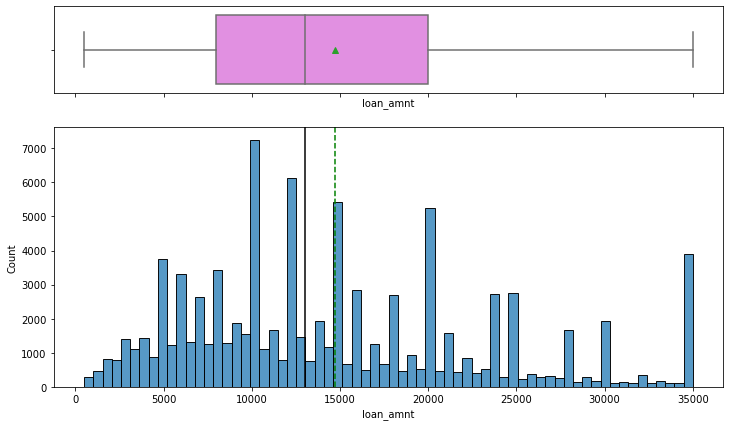

<IPython.core.display.Javascript object>

In [138]:
histogram_boxplot(data_train, "loan_amnt")

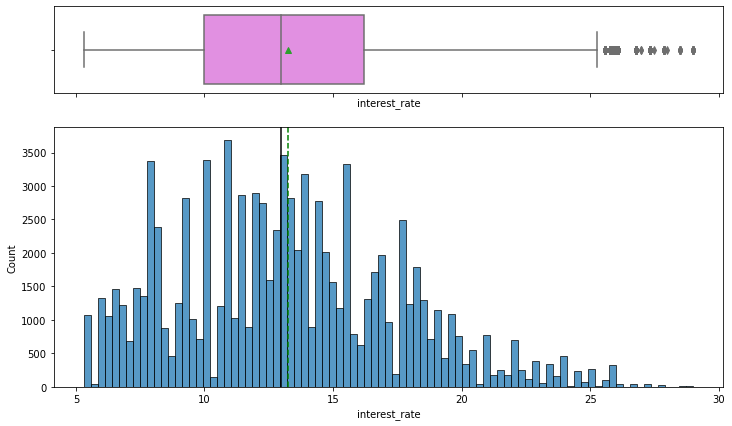

<IPython.core.display.Javascript object>

In [139]:
histogram_boxplot(data_train, "interest_rate")

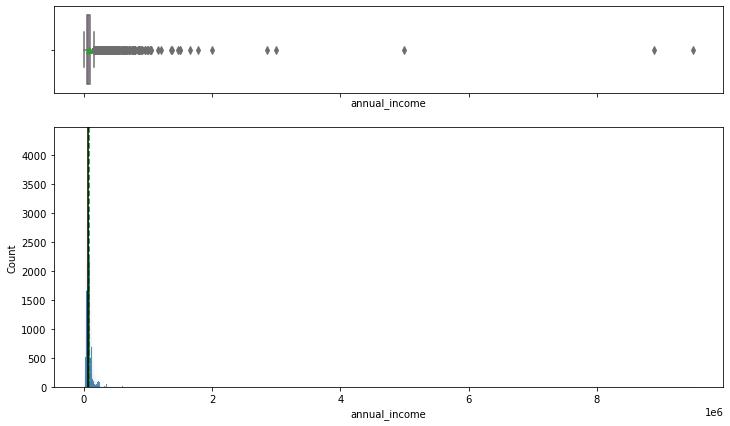

<IPython.core.display.Javascript object>

In [140]:
histogram_boxplot(data_train, "annual_income")

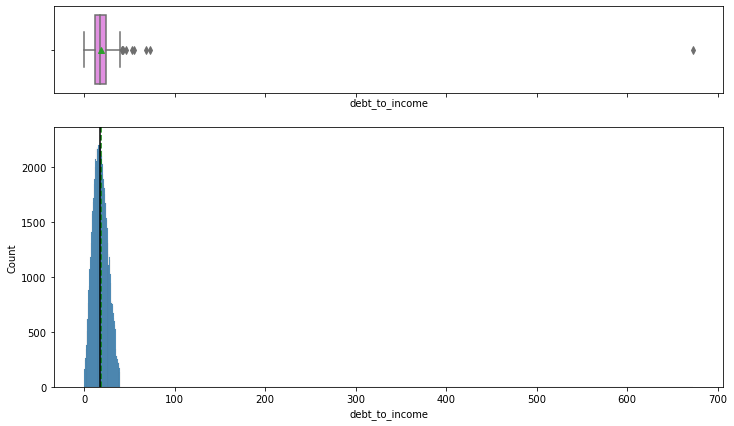

<IPython.core.display.Javascript object>

In [141]:
histogram_boxplot(data_train, "debt_to_income")

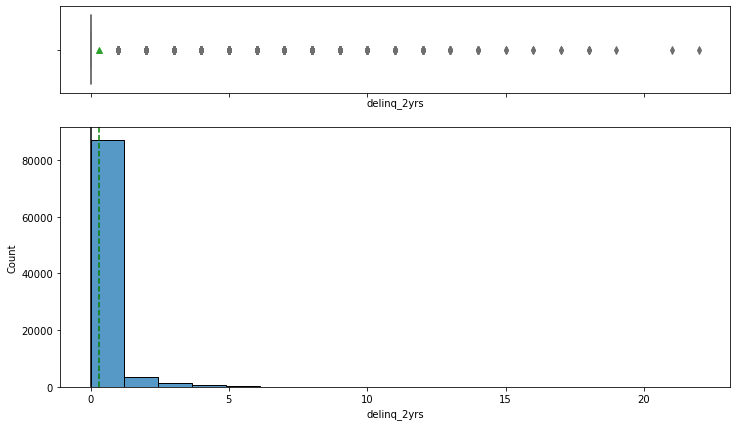

<IPython.core.display.Javascript object>

In [142]:
histogram_boxplot(data_train, "delinq_2yrs")

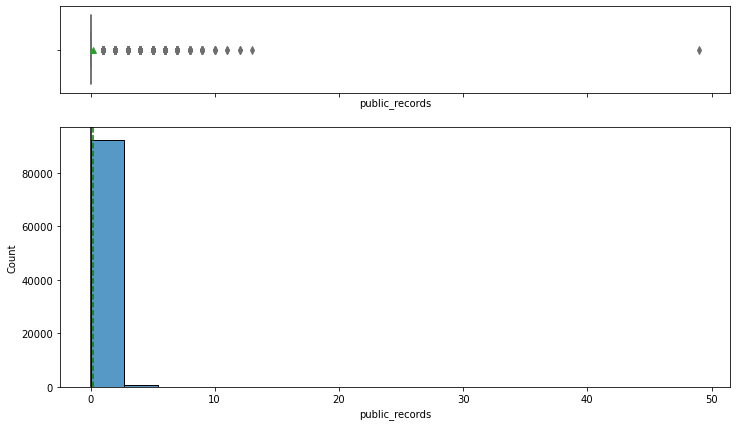

<IPython.core.display.Javascript object>

In [143]:
histogram_boxplot(data_train, "public_records")

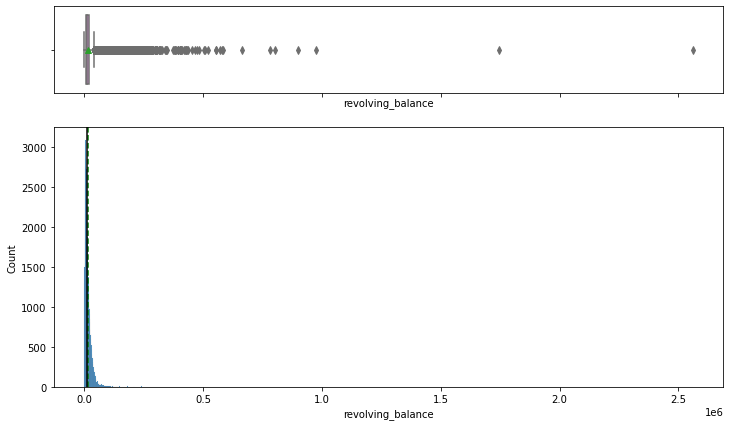

<IPython.core.display.Javascript object>

In [144]:
histogram_boxplot(data_train, "revolving_balance")

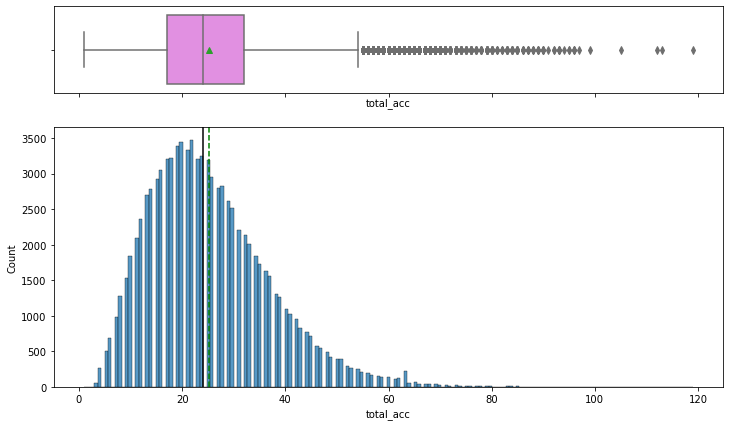

<IPython.core.display.Javascript object>

In [145]:
histogram_boxplot(data_train, "total_acc")

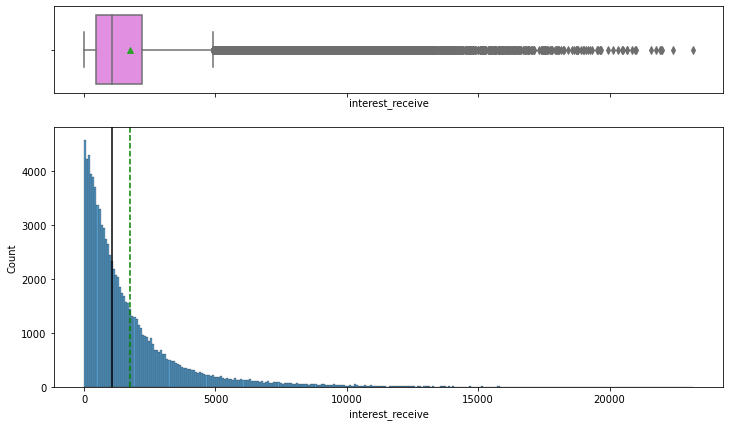

<IPython.core.display.Javascript object>

In [146]:
histogram_boxplot(data_train, "interest_receive")

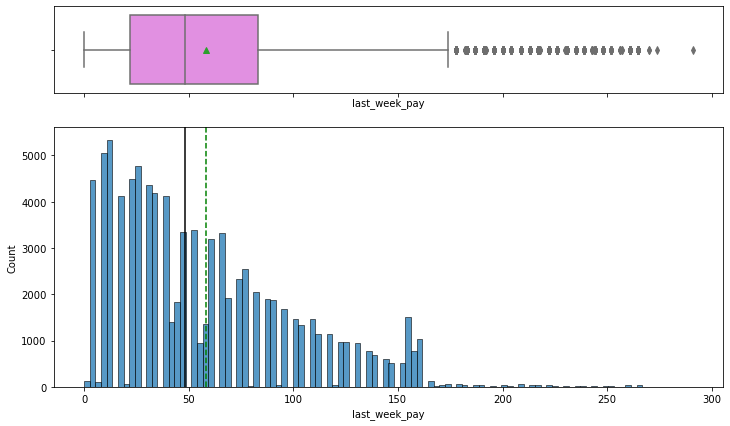

<IPython.core.display.Javascript object>

In [147]:
histogram_boxplot(data_train, "last_week_pay")

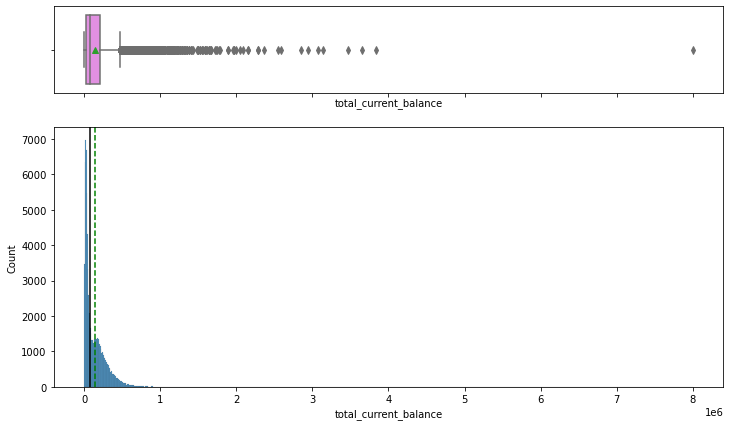

<IPython.core.display.Javascript object>

In [148]:
histogram_boxplot(data_train, "total_current_balance")

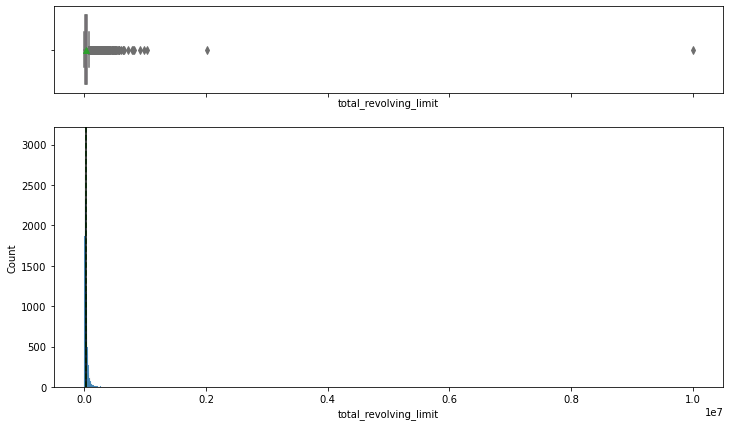

<IPython.core.display.Javascript object>

In [149]:
histogram_boxplot(data_train, "total_revolving_limit")

In [150]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

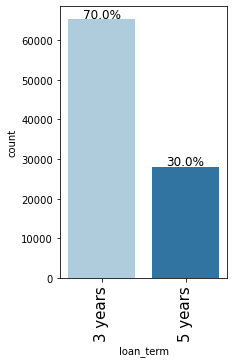

<IPython.core.display.Javascript object>

In [151]:
labeled_barplot(data_train, "loan_term", perc=True)

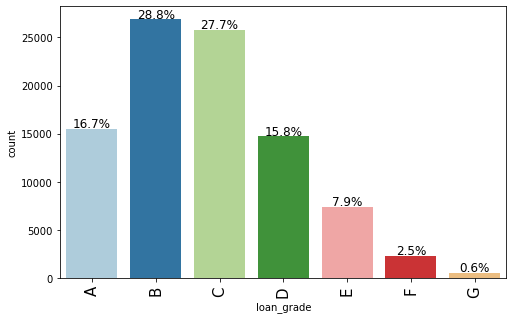

<IPython.core.display.Javascript object>

In [152]:
labeled_barplot(data_train, "loan_grade", perc=True)

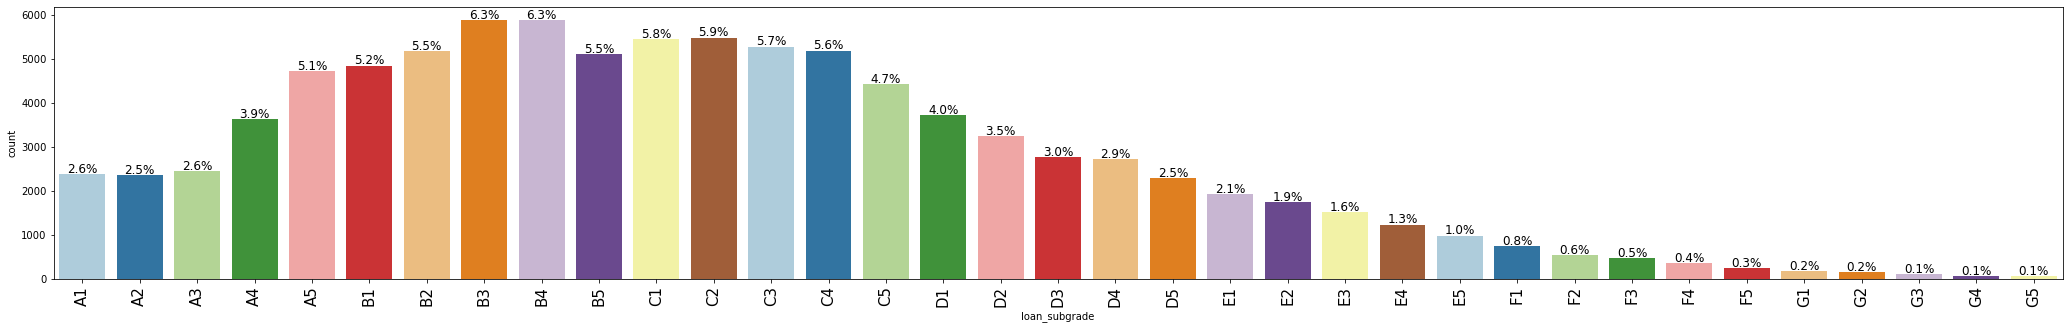

<IPython.core.display.Javascript object>

In [153]:
labeled_barplot(data_train, "loan_subgrade", perc=True)

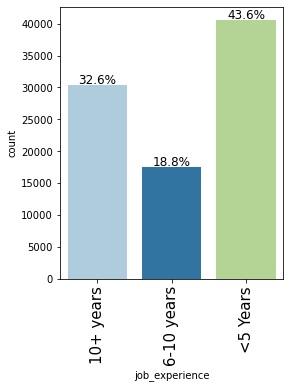

<IPython.core.display.Javascript object>

In [154]:
labeled_barplot(data_train, "job_experience", perc=True)

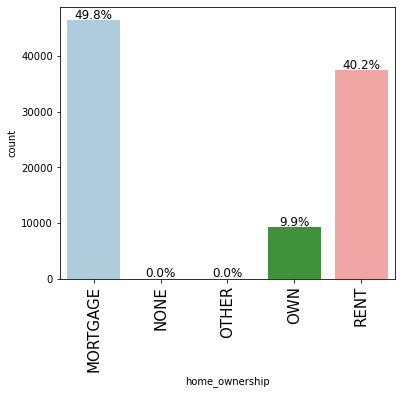

<IPython.core.display.Javascript object>

In [155]:
labeled_barplot(data_train, "home_ownership", perc=True)

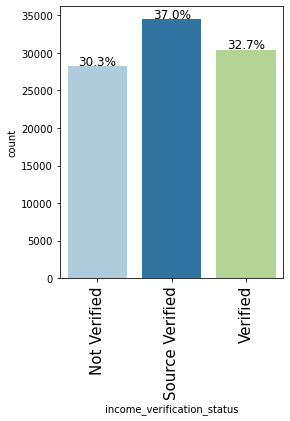

<IPython.core.display.Javascript object>

In [156]:
labeled_barplot(data_train, "income_verification_status", perc=True)

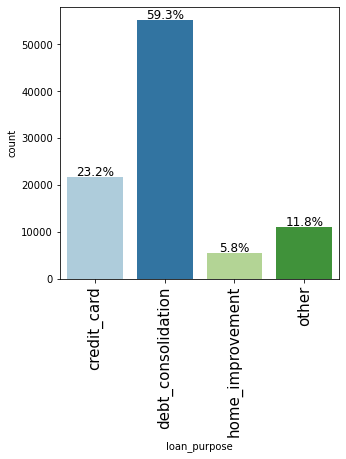

<IPython.core.display.Javascript object>

In [157]:
labeled_barplot(data_train, "loan_purpose", perc=True)

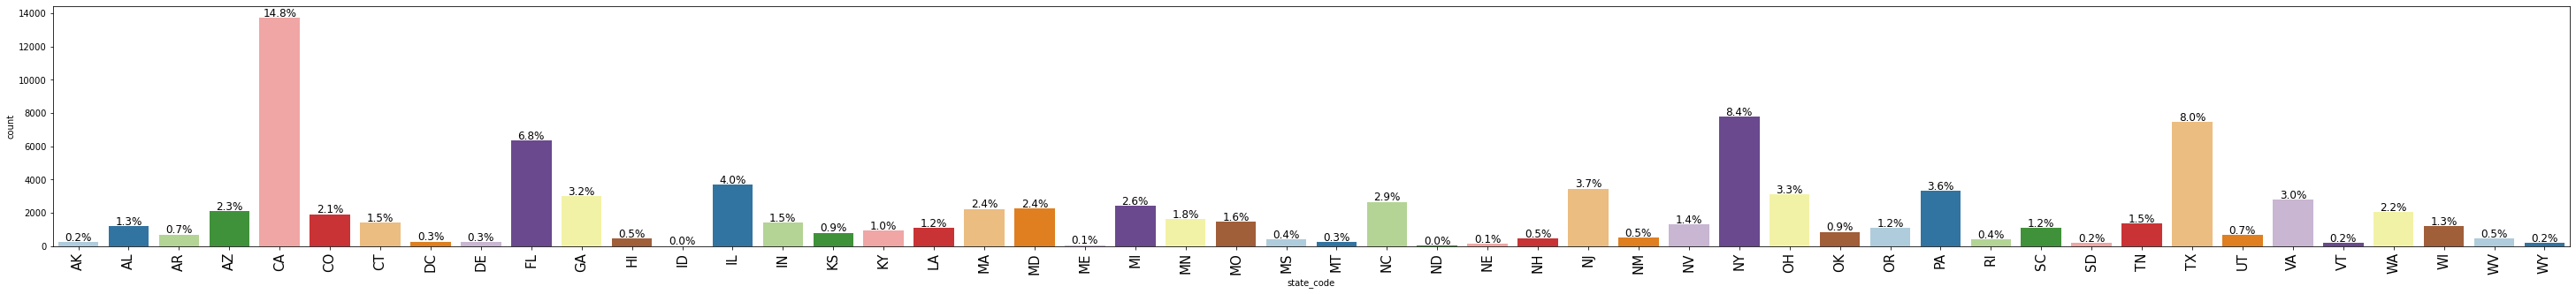

<IPython.core.display.Javascript object>

In [158]:
labeled_barplot(data_train, "state_code", perc=True)

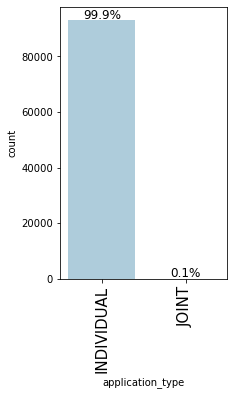

<IPython.core.display.Javascript object>

In [159]:
labeled_barplot(data_train, "application_type", perc=True)

### Lets look at dependent variable

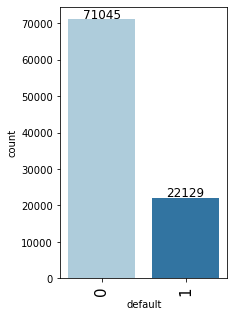

<IPython.core.display.Javascript object>

In [160]:
labeled_barplot(
    data_train, "default"
)  ##  class distribution in target variable for train data

- Unbalanced data

### Observations:
- All 


## Data Pre-processing

In [168]:
# creating dummy varibles
dummy_data_train = pd.get_dummies(
    data_train,
    columns=[
        "loan_term",
        "loan_grade",
        "loan_subgrade",
        "job_experience",
        "income_verification_status",
        "loan_purpose",
        "state_code",
        "application_type",
        "home_ownership",
    ],
    drop_first=True,
)
dummy_data_train.head()

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,9000,9.170,85000.000,26.680,0.000,0.000,39519,20.000,59.600,4.000,95493.000,84100.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,18000,13.650,64000.000,31.670,0.000,1.000,9783,24.000,3348.250,95.000,185433.000,13500.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16000,7.260,150000.000,19.700,2.000,0.000,13641,27.000,276.690,13.000,180519.000,19300.000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,25000,13.990,59800.000,37.390,0.000,0.000,35020,35.000,1106.720,17.000,183208.000,55400.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17000,6.390,72000.000,8.920,0.000,0.000,23990,26.000,725.290,39.000,23990.000,81300.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [169]:
# creating dummy varibles
dummy_data_test = pd.get_dummies(
    data_test,
    columns=[
        "loan_term",
        "loan_grade",
        "loan_subgrade",
        "job_experience",
        "income_verification_status",
        "loan_purpose",
        "state_code",
        "application_type",
        "home_ownership",
    ],
    drop_first=True,
)
dummy_data_test.head()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,4855329,12000,15.310,73400.000,14.620,0.000,0.000,22156,30.000,2290.240,87.000,128098.000,25800.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,66862420,12000,7.260,105000.000,11.380,0.000,0.000,7592,14.000,202.680,13.000,269396.000,23600.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3637416,15000,14.330,50000.000,28.150,0.000,1.000,17983,19.000,1166.240,30.000,220135.000,34100.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53682249,12000,9.990,37000.000,34.320,0.000,0.000,12262,18.000,635.060,35.000,39436.000,21700.000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,53937165,20150,11.530,75000.000,26.740,1.000,0.000,8251,11.000,1232.840,31.000,52764.000,12000.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [170]:
# Dividing data into X and y
## Train data
X = dummy_data_train.drop(
    ["default"], axis=1
)  ##  code to drop target variable from train data
y = dummy_data_train["default"]  ##  code to store target variable in y

## Test data
X_test = dummy_data_test

<IPython.core.display.Javascript object>

In [171]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)  ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(69880, 114) (23294, 114) (39933, 115)


<IPython.core.display.Javascript object>

In [172]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [173]:
# Fit and transform the train data
X_train = pd.DataFrame(
    imputer.fit_transform(X_train), columns=X_train.columns
)  ## code to impute missing values in X_train

# Transform the validation data
X_val = pd.DataFrame(
    imputer.fit_transform(X_val), columns=X_val.columns
)  ## code to impute missing values in X_val

# Transform the test data
X_test = pd.DataFrame(
    imputer.fit_transform(X_test), columns=X_test.columns
)  ## code to impute missing values in X_test

<IPython.core.display.Javascript object>

In [174]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

print(
    X_val.isna().sum()
)  ## code to check the count of missing values in validation set
print("-" * 30)
print(X_test.isna().sum())  ## code to check the count of missing values in test set

loan_amnt                                     0
interest_rate                                 0
annual_income                                 0
debt_to_income                                0
delinq_2yrs                                   0
public_records                                0
revolving_balance                             0
total_acc                                     0
interest_receive                              0
last_week_pay                                 0
total_current_balance                         0
total_revolving_limit                         0
loan_term_5 years                             0
loan_grade_B                                  0
loan_grade_C                                  0
loan_grade_D                                  0
loan_grade_E                                  0
loan_grade_F                                  0
loan_grade_G                                  0
loan_subgrade_A2                              0
loan_subgrade_A3                        

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The focus is to accurately predict whether a client will default on the loan payment or not so accuracy score is the key measure.
So correctly predicting a default as default and non-default as non-default.
It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.



**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [175]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [176]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- To maximize accuracy, we can use accuracy as a **scorer** in cross-validation and hyperparameter tuning.

In [177]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [180]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("logit", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
## models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Bagging", BaggingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Score:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Score:

logit: 0.7710933028048081
dtree: 0.7879507727532913
Random forest: 0.8232112192329708
GBM: 0.822853463079565
Adaboost: 0.8201488265598169
Bagging: 0.8455495134516313

Validation Performance:

logit: 0.7655190177728171
dtree: 0.7804155576543316
Random forest: 0.801064651841676
GBM: 0.797329784493861
Adaboost: 0.7947540139091611
Bagging: 0.8292264102343951


<IPython.core.display.Javascript object>

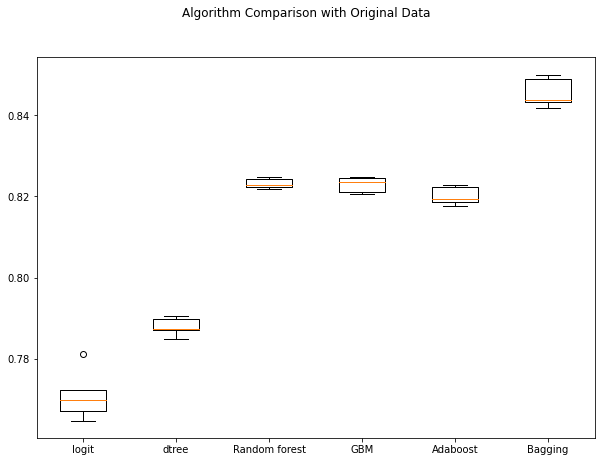

<IPython.core.display.Javascript object>

In [181]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Original Data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled data


In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 16597
Before OverSampling, counts of label '0': 53283 

After OverSampling, counts of label '1': 53283
After OverSampling, counts of label '0': 53283 

After OverSampling, the shape of train_X: (106566, 114)
After OverSampling, the shape of train_y: (106566,) 



<IPython.core.display.Javascript object>

In [184]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("logit", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
## models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Bagging", BaggingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Score:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Score:

logit: 0.625002402891093
dtree: 0.8495673596293013
Random forest: 0.8857797039396024
GBM: 0.8799898478704344
Adaboost: 0.8640654321454395
Bagging: 0.8911753907708931

Validation Performance:

logit: 0.6540310809650554
dtree: 0.7631149652270971
Random forest: 0.8119687473169056
GBM: 0.8025671846827509
Adaboost: 0.7873272087232763
Bagging: 0.8196102000515154


<IPython.core.display.Javascript object>

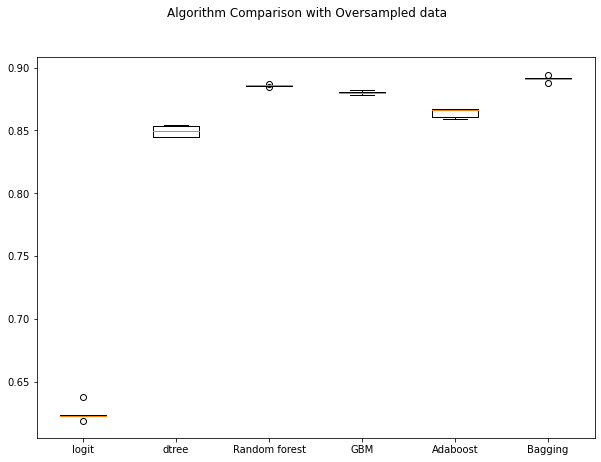

<IPython.core.display.Javascript object>

In [185]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Oversampled data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Undersampled data

In [186]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 16597
Before UnderSampling, counts of label '0': 53283 

After UnderSampling, counts of label '1': 16597
After UnderSampling, counts of label '0': 16597 

After UnderSampling, the shape of train_X: (33194, 114)
After UnderSampling, the shape of train_y: (33194,) 



<IPython.core.display.Javascript object>

In [187]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("logit", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
## models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Bagging", BaggingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Score:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Score:

logit: 0.6146294134820397
dtree: 0.7051574005004165
Random forest: 0.7258540417877306
GBM: 0.7263962467439633
Adaboost: 0.6938601281488712
Bagging: 0.75278652566633

Validation Performance:

logit: 0.6176697862110415
dtree: 0.6940413840473941
Random forest: 0.7553017944535073
GBM: 0.735296642912338
Adaboost: 0.7184682750922985
Bagging: 0.7827766806903065


<IPython.core.display.Javascript object>

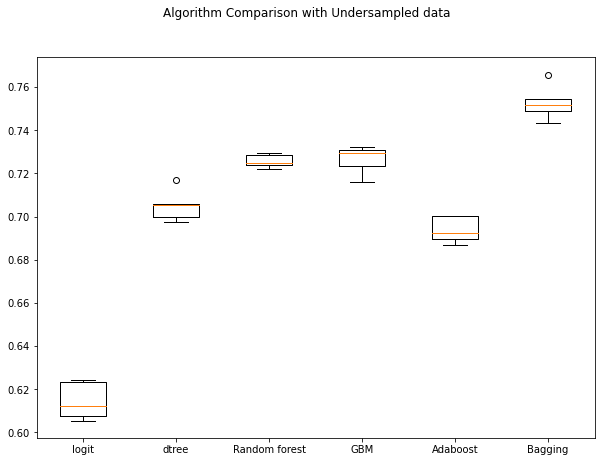

<IPython.core.display.Javascript object>

In [188]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Undersampled data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## Hyperparameter Tuning

### Tunning Decision tree with oversampled data

In [189]:
%%time
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.7634905706925672:
Wall time: 16.3 s


<IPython.core.display.Javascript object>

In [203]:
# Creating new pipeline with best parameters
tuned_dtree = DecisionTreeClassifier(
    min_impurity_decrease=0.001, max_leaf_nodes=10, min_samples_leaf=7, max_depth=5,
)  ## Complete the code with the best parameters obtained from tuning

tuned_dtree.fit(
    X_train_over, y_train_over
)  ## Complete the code to fit the model on under sampled data

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

<IPython.core.display.Javascript object>

In [204]:
tuned_dtree_train_perf = model_performance_classification_sklearn(
    tuned_dtree, X_train_over, y_train_over
)
tuned_dtree_train_perf

,Accuracy,Recall,Precision,F1
0,0.763,0.695,0.804,0.746


<IPython.core.display.Javascript object>

In [205]:
tuned_dtree_val_perf = model_performance_classification_sklearn(
    tuned_dtree, X_val, y_val
)
tuned_dtree_val_perf

,Accuracy,Recall,Precision,F1
0,0.726,0.416,0.423,0.419


<IPython.core.display.Javascript object>

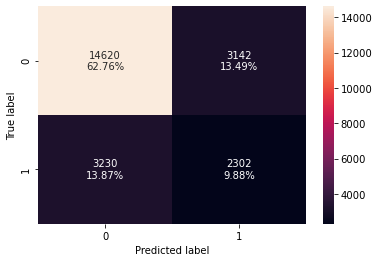

<IPython.core.display.Javascript object>

In [206]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_dtree, X_val, y_val)

### Tunning Gradient Boosting Classifier with oversampled data

In [284]:
%%time
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.7, 0.9], #[0.5, 0.7]
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.8836046317094512:
Wall time: 7min 27s


<IPython.core.display.Javascript object>

In [195]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5, random_state=1, learning_rate=1, n_estimators=125, subsample=0.7
)  ## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

best performing parameters so far with score of 88% - GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [196]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.912,0.868,0.951,0.908


<IPython.core.display.Javascript object>

In [197]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.832,0.446,0.746,0.558


<IPython.core.display.Javascript object>

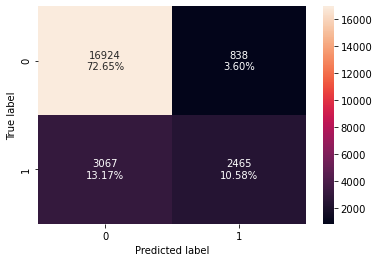

<IPython.core.display.Javascript object>

In [198]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

### Tunning Bagging Classifier with oversampled data

In [277]:
%%time
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [1.0, 1.1, 1.2],
    "n_estimators": [90, 110, 130],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 90, 'max_samples': 0.9, 'max_features': 1.0} with CV score=0.8817843477635607:
Wall time: 19min 27s


<IPython.core.display.Javascript object>

In [278]:
# Creating new pipeline with best parameters
tuned_bag = BaggingClassifier(
    n_estimators=90, max_samples=0.9, max_features=1.0
)  ## Complete the code with the best parameters obtained from tuning

tuned_bag.fit(
    X_train_over, y_train_over
)  ## Complete the code to fit the model on oversampled data

BaggingClassifier(max_samples=0.9, n_estimators=90)

<IPython.core.display.Javascript object>

In [279]:
tuned_bag_train_perf = model_performance_classification_sklearn(
    tuned_bag, X_train_over, y_train_over
)
tuned_bag_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [280]:
tuned_bag_val_perf = model_performance_classification_sklearn(tuned_bag, X_val, y_val)
tuned_bag_val_perf

,Accuracy,Recall,Precision,F1
0,0.833,0.394,0.802,0.528


<IPython.core.display.Javascript object>

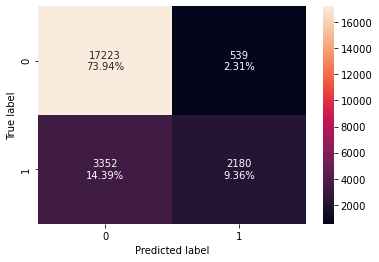

<IPython.core.display.Javascript object>

In [281]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_bag, X_val, y_val)

### Tunning Random Forest with Oversampled data

In [208]:
%%time
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8705803583730617:
Wall time: 8min 20s


<IPython.core.display.Javascript object>

In [214]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.6,
    n_estimators=250,
    min_samples_leaf=1,
)  ## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(
    X_train_over, y_train_over
)  ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [216]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.989,0.977,1.000,0.988


<IPython.core.display.Javascript object>

In [217]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.813,0.255,0.851,0.393


<IPython.core.display.Javascript object>

### Tunning Ada Boost Classifier with oversampled data

In [285]:
%%time
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300], ## [100, 150, 200]
    "learning_rate": [0.3, 0.2], ## [0.2, 0.05]
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'learning_rate': 0.3, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8887564742400894:
Wall time: 32min 25s


<IPython.core.display.Javascript object>

In [219]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)  ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(
    X_train_un, y_train_un
)  ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

In [220]:
ada_train_perf = model_performance_classification_sklearn(
    tuned_ada, X_train_un, y_train_un
)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.829,0.790,0.858,0.822


<IPython.core.display.Javascript object>

In [221]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.818,0.712,0.598,0.650


<IPython.core.display.Javascript object>

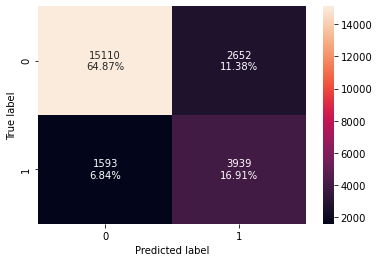

<IPython.core.display.Javascript object>

In [222]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_ada, X_val, y_val)

## Model performance comparison and choosing the final model

In [282]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_dtree_train_perf.T,
        gbm_train_perf.T,
        tuned_bag_train_perf.T,
        rf2_train_perf.T,
        ada_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree tuned with oversampled data",
    "Gradient Boosting tuned with oversampled data",
    "Bagging Classifier with oversampled data",
    "Random forest tuned with undersampled data",
    "AdaBoost classifier tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree tuned with oversampled data,Gradient Boosting tuned with oversampled data,Bagging Classifier with oversampled data,Random forest tuned with undersampled data,AdaBoost classifier tuned with undersampled data
Accuracy,0.763,0.912,1.000,0.989,0.829
Recall,0.695,0.868,1.000,0.977,0.790
Precision,0.804,0.951,1.000,1.000,0.858
F1,0.746,0.908,1.000,0.988,0.822


<IPython.core.display.Javascript object>

In [283]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_dtree_val_perf.T,
        gbm_val_perf.T,
        tuned_bag_val_perf.T,
        rf2_val_perf.T,
        ada_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree tuned with oversampled data",
    "Gradient Boosting tuned with oversampled data",
    "Bagging Classifier with oversampled data",
    "Random forest tuned with undersampled data",
    "AdaBoost classifier tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree tuned with oversampled data,Gradient Boosting tuned with oversampled data,Bagging Classifier with oversampled data,Random forest tuned with undersampled data,AdaBoost classifier tuned with undersampled data
Accuracy,0.726,0.832,0.833,0.813,0.818
Recall,0.416,0.446,0.394,0.255,0.712
Precision,0.423,0.746,0.802,0.851,0.598
F1,0.419,0.558,0.528,0.393,0.650


<IPython.core.display.Javascript object>

In [ ]:
- Our best performing tuned model on all scores is the Bagging Classifier tuned with Oversampled data
- As a result of this we will choose this as our final model
- We will also go ahead and test the performance of this model on test data/production

### Feature Importance

### Predict default level for test set provided

In [256]:
X_test_pred = X_test.copy()
ID_Label = X_test_pred["ID"]
X_test_pred.drop(columns=["ID"], inplace=True)
X_test_pred.head()

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,12000.000,15.310,73400.000,14.620,0.000,0.000,22156.000,30.000,2290.240,87.000,128098.000,25800.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,12000.000,7.260,105000.000,11.380,0.000,0.000,7592.000,14.000,202.680,13.000,269396.000,23600.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,15000.000,14.330,50000.000,28.150,0.000,1.000,17983.000,19.000,1166.240,30.000,220135.000,34100.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1

<IPython.core.display.Javascript object>

In [257]:
ID_Label.head()

0    4855329.000
1   66862420.000
2    3637416.000
3   53682249.000
4   53937165.000
Name: ID, dtype: float64

<IPython.core.display.Javascript object>

In [275]:
# Predict using best model and store values in dataframe
Solution = tuned_bag.predict(X_test_pred)
Prediction = pd.DataFrame(Prediction)
frames = [ID_Label, Prediction]
Results = pd.concat(frames, axis=1)
Results.tail()

,ID,0
39928,57779318.000,0
39929,59742362.000,0
39930,72657145.000,0
39931,15220189.000,0
39932,21810584.000,0


<IPython.core.display.Javascript object>

In [276]:
Results.to_csv("Results.csv")

<IPython.core.display.Javascript object>

Parameters for 1st Submission performance is - BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

***